### Machine Learning: Exercise 1: Linear Regression
This notebook is a Python implementation of Exercise 1 from the Machine Learning Course given by Andrew Ng on Coursera. It follows the live script including the optional excercises and includes a interactive plot for the cost function. At the end of the notebook there is also a simple implementation with scikit-learn added.<br>
**Author:** Pascal Wenger<br>
**Created:** 06.Sept 2018

#### Linear Regression with one variable

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive
import seaborn as sns

print('#'*79) # guidance python pep: maximum lenght 79 characters

###############################################################################


In [2]:
# load data (the ex1data1.txt must be in the same directoy as this notebook)
path = os.getcwd()
df = pd.read_csv(os.path.join(path, "ex1data1.txt"), header = None)
df.head(3)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


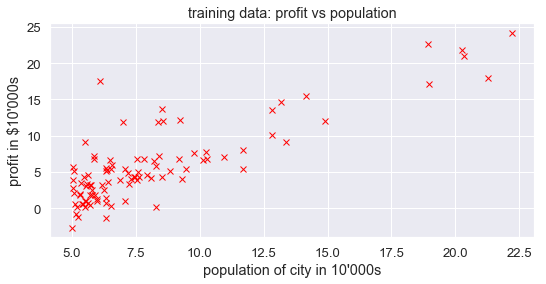

In [3]:
# plot rawdata
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(22/2.54, 10/2.54))
ax.plot(df.iloc[:,0], df.iloc[:,1], 'x', color='red', mew=1)
ax.set_title("training data: profit vs population")
ax.set_xlabel("population of city in 10'000s")
ax.set_ylabel("profit in $10'000s")
plt.show()

In [4]:
# Parameter settings for Gradient Descent:

# number of training data:
m = len(df.iloc[:,1])

# X = population, y = profit
X = df.iloc[:,0].values
y = df.iloc[:,1].values
  
# Add column of ones to X (for intercept term):
Xtrain = np.column_stack((np.ones((m,1)), X))
ytrain = y.reshape((m,1))

# initialize fitting parameters
theta_0 = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [5]:
# define cost function:
def compute_cost(X, y, theta):
    """
    theta: row vector with parameters
    X    : matrix with input features 
           rows: number of training examples
           cols: number of features
    y    : row vector with targets of training examples
    """
    # number of training examples:
    m = len(y)
    
    # cost function J:
    J = 1/(2*m) * np.sum((X @ theta - y)**2)
    
    return J

In [6]:
# Compute and display initial cost
J = compute_cost(Xtrain, ytrain, theta_0)
print("Initial value for cost function J " +
      "with theta =[0,0]: {:0.4f}.".format(J))

Initial value for cost function J with theta =[0,0]: 32.0727.


In [7]:
# define gradient descent function:
def gradient_descent(X, y, theta_ini, alpha, num_iters):
    """
    X        : matrix with input features 
               rows: number of training examples
               cols: number of features
    y        : row vector with targets of training examples   
    theta_ini: row vector with initial parameters
    alpha    : learning rate, scalar value
    num_iters: number of iterations, scalar value
    """
    # initialize some useful values:
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters+1, 1))
    # initial cost value:
    J_history[0] = compute_cost(X, y, theta_ini)
    
    # deep copys of theta_ini (to avoid any interferences):
    theta = np.copy(theta_ini)
    theta_new = np.copy(theta_ini)
    
    # compute gradient descent and its cost functions:
    for iter in range(num_iters):
        
        for j in range(len(theta_ini)):
            # @ is short version for np.dot()
            dJ = np.sum(((X @ theta)[:,0] - y[:,0]) * X[:,j])
            
            theta_new[j] = theta[j] - alpha/m * dJ
            
        theta[:] = theta_new[:]
        J_history[iter+1] = compute_cost(X, y, theta)
    
    return J_history, theta            

In [8]:
# run gradient descent
J_history, theta  = gradient_descent(Xtrain, ytrain, theta_0, 
                                     alpha, iterations) 

# print final theta:
print("Theta computed from gradient descent: "+
      "{:0.6f}, {:0.6f}.".format(theta[0,0], theta[1,0]))
print("Minimum of cost function J: {:.4f}".format(J_history[-1][0]))

Theta computed from gradient descent: -3.630291, 1.166362.
Minimum of cost function J: 4.4834


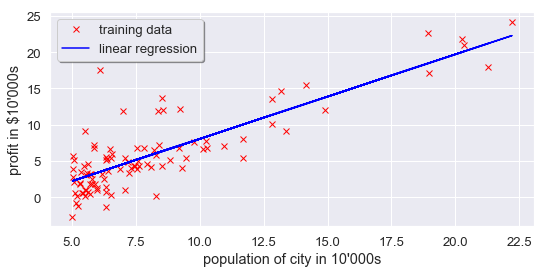

In [9]:
# plot linear fit:
fig, ax = plt.subplots(figsize=(22/2.54, 10/2.54))

ax.plot(df.iloc[:,0], df.iloc[:,1], 'x', color='red', mew=1,
        label = "training data")

ax.plot(df.iloc[:,0], theta[0,0] + theta[1,0]*df.iloc[:,0], '-',
        color='blue', label = "linear regression")

ax.set_xlabel("population of city in 10'000s")
ax.set_ylabel("profit in $10'000s")
plt.legend(frameon=True, shadow=True)
plt.show()

In [10]:
# predict values for population sizes of 35,000 and 70,000:
print("For population = 35'000, we predict a profit of ",
      "${:0.6f}".format((theta[0,0] + theta[1,0]*3.5)*1E4))

print("For population = 70'000, we predict a profit of ",
      "${:0.6f}".format((theta[0,0] + theta[1,0]*7.0)*1E4))

For population = 35'000, we predict a profit of  $4519.767868
For population = 70'000, we predict a profit of  $45342.450129


##### Visualizing J(theta):

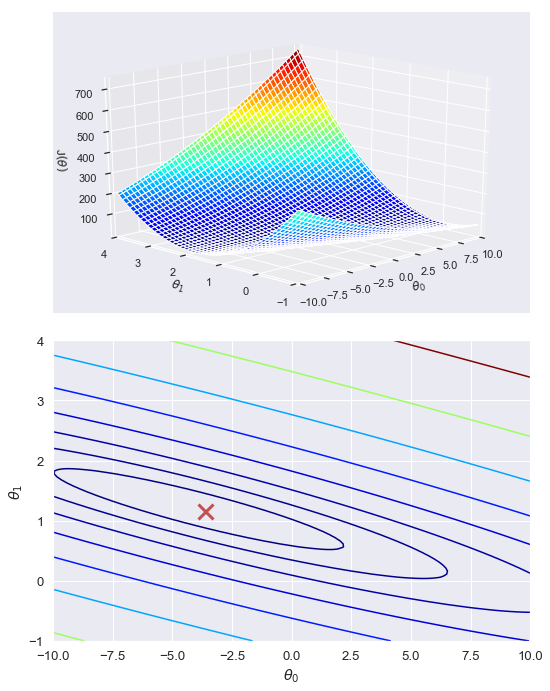

In [11]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(theta0_vals, theta1_vals)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([ [theta0_vals[i]], [theta1_vals[j]] ])   
        J_vals[i,j] = compute_cost(Xtrain, ytrain, t)

# plot data:
sns.set(font_scale=1.0)
fig = plt.figure(figsize = (20/2.54, 25/2.54))

# surface plot:
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(X, Y, J_vals.T, antialiased=True, cmap=plt.cm.jet)
ax.set_xlabel(r'$\theta_\mathrm{0}$')
ax.set_ylabel(r'$\theta_\mathrm{1}$')
ax.set_zlabel(r'J$(\theta)$')
ax.set_xlim([-10,10])
ax.set_ylim([-1, 4])
ax.view_init(20, 225)

# contour plot:
sns.set(font_scale=1.2)
ax = fig.add_subplot(2, 1, 2)
ax.contour(X, Y, J_vals.T, np.logspace(-2, 3, num=20), cmap=plt.cm.jet)
ax.plot(theta[0], theta[1], 'rx', markerSize=15, markeredgewidth=3)
ax.set_xlabel(r'$\theta_\mathrm{0}$')
ax.set_ylabel(r'$\theta_\mathrm{1}$')

plt.tight_layout()
plt.show()

#### Linear Regression with multiple variables

In [12]:
# load data (the ex1data2.txt must be in the same directoy as this notebook)
path = os.getcwd()
df = pd.read_csv(os.path.join(path, "ex1data2.txt"), header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
m = len(df)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))
print("Number of training examples: {}".format(m))

Shape of X: (47, 2)
Shape of y: (47,)
Number of training examples: 47


In [14]:
# feature normalization function:
def feature_normalization(X):
    """
    normalize feature matrix 
    mu :      mean value per feature
    sig:      standard devitation per feature
    equation: (x - mu) / std
    """
    mu = np.mean(X, axis=0)
    sig = np.std(X, axis=0)
    
    X_norm = (X - mu) / sig
    
    return sig, mu, X_norm

In [15]:
# normalize feature matrix:
sig, mu, X = feature_normalization(X)

# add x0=1 column to feature matrix (for intercept term):
Xtrain = np.column_stack((np.ones((m,1)), X))
ytrain = y.reshape((m,1))

print("Shape of Xtrain: {}".format(Xtrain.shape))
print("Shape of ytrain: {}".format(ytrain.shape))

Shape of Xtrain: (47, 3)
Shape of ytrain: (47, 1)


In [16]:
# run gradient descent
# set parameters:
alpha = 0.1
iterations = 400
theta_0 = np.zeros((Xtrain.shape[1],1))

# run gradient descent:
J_history, theta_gd = gradient_descent(Xtrain, ytrain, theta_0, 
                                       alpha, iterations) 

# print final theta:
print("Theta computed from Gradient Descent: \n"+
      "{:0.3f}, {:0.3f}, {:0.3f}.".format(theta_gd[0,0], theta_gd[1,0], 
                                          theta_gd[2,0]))
print("Theta shape: {}".format(theta_gd.shape))

Theta computed from Gradient Descent: 
340412.660, 109447.796, -6578.354.
Theta shape: (3, 1)


In [17]:
# estimate price of a 1650sq-ft, 3 bedroom house:
feature = np.array([1650, 3]).reshape((1,2))

# feature normalize:
feature_norm = (feature - mu) / sig

# add x0=1 column to feature matrix:
feature_norm = np.column_stack((np.ones((1)), feature_norm))

price = feature_norm @ theta_gd

print("Estimated price for a 1650sq-ft,",
      "3-bedroom flat: ${:0.0f}.".format(price[0,0]))
print("")

Estimated price for a 1650sq-ft, 3-bedroom flat: $293081.



In [18]:
# define function for intreractive plot
def cost_parameters(alpha = 0.1, iterations = 400):
    # set figure:
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(figsize=(22/2.54, 10/2.54))
    
    # Cost function to vary::
    def J_iter(Xtrain=Xtrain, ytrain=ytrain, 
               alpha=alpha, n_iter=iterations):
        # set initial theta to zeros:
        theta_0 = np.zeros((Xtrain.shape[1],1))
        # compute cost function for paramters
        J_hist, _= gradient_descent(Xtrain, ytrain, theta_0, alpha, n_iter)
        return J_hist

    # visualizing J(theta):
    ax.plot(J_iter(), color='red', linewidth=5)
    s0 = "       "
    s1 = "cost function vs iteration for: "
    s2 = "$\\alpha$ = {:4.3f}  ".format(alpha)
    s3 = "and ${\\theta_{\mathrm{ini}}}$= [0;0;0]"
    ax.set_title(s0 + s1 + s2 + s3)
    ax.set_xlabel("number of iterations")
    ax.set_ylabel("cost function J(theta)")
    ax.set_xlim([-25,225])
    plt.show()

In [19]:
# display interactive plot:
w = interactive(cost_parameters, alpha=(0.01, 1.5), iterations=(50, 200))
display(w)

interactive(children=(FloatSlider(value=0.1, description='alpha', max=1.5, min=0.01), IntSlider(value=200, des…

#### Linear Regression with multiple variables using the Normal Equation

In [20]:
# define normal equation:
def normal_equation(X, y):
    """
    X        : matrix with input features 
               rows: number of training examples
               cols: number of features
    y        : row vector with targets of training examples   
    theta    : row vector with parameters
    """
    
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
  
    return theta

In [21]:
# load data (the ex1data2.txt must be in the same directoy as this notebook)
path = os.getcwd()
df = pd.read_csv(os.path.join(path, "ex1data2.txt"), header = None)

m = len(df)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))
print("Number of training examples: {}".format(m))

Shape of X: (47, 2)
Shape of y: (47,)
Number of training examples: 47


In [22]:
# add x0=1 column to feature matrix:
Xtrain = np.column_stack((np.ones((m,1)), X))
ytrain = y.reshape((m,1))
print("Shape of Xtrain: {}".format(Xtrain.shape))
print("Shape of ytrain: {}".format(ytrain.shape))

Shape of Xtrain: (47, 3)
Shape of ytrain: (47, 1)


In [23]:
# run normal equation
theta_n = normal_equation(Xtrain, ytrain)

# print final theta from normal equation:
print("Theta computed from normal equation: "+
      "\n{:0.6f}, {:0.6f}, {:0.6f}".format(theta_n[0,0], theta_n[1,0],
                                          theta_n[2,0]))

Theta computed from normal equation: 
89597.909543, 139.210674, -8738.019112


In [24]:
# estimate price of a 1650sq-ft, 3 bedroom house:
feature = np.array([1650, 3]).reshape((1,2))

# add x0=1 column to feature matrix(for intercept term):
feature = np.column_stack((np.ones((1)), feature))

price = feature @ theta_n

print("Estimated price for a 1650sq-ft,",
      "3-bedroom flat: ${}.".format(int(price)))

Estimated price for a 1650sq-ft, 3-bedroom flat: $293081.


#### Linear Regression with multiple variables using sckit-learn

In [25]:
from sklearn import linear_model

In [26]:
# load data (the ex1data2.txt must be in the same directoy as this notebook)
path = os.getcwd()
df = pd.read_csv(os.path.join(path, "ex1data2.txt"), header = None)
df.head(3)

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


In [27]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
prediction = reg.predict(X)

In [29]:
# estimate price of a 1650sq-ft, 3 bedroom house:
feature = np.array([1650, 3]).reshape((1,2))

# add x0=1 column to feature matrix(for intercept term):
feature = np.column_stack((np.ones((1)), feature))

price = feature @ np.array([[reg.intercept_],[reg.coef_[0]],[reg.coef_[1]]])
print("Estimated price for a 1650sq-ft,",
      "3-bedroom flat: ${}.".format(int(price)))

Estimated price for a 1650sq-ft, 3-bedroom flat: $293081.


In [30]:
print("Theta computed wiht Linear Regression from sclit-learn: \n" +
      "[{:.6f}, {:.6f}, {:.6f}]".format(reg.intercept_, reg.coef_[0],
                                        reg.coef_[1]))

Theta computed wiht Linear Regression from sclit-learn: 
[89597.909543, 139.210674, -8738.019112]


In [31]:
# compare with Theta given by the normale equation:
print("Theta computed from Normal Equation: "+
      "\n{:0.6f}, {:0.6f}, {:0.6f}".format(theta_n[0,0], theta_n[1,0],
                                          theta_n[2,0]))

Theta computed from Normal Equation: 
89597.909543, 139.210674, -8738.019112
